# Classical Machine Learning Algorithms

This notebook demonstrates various classical ML algorithms.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load and Prepare Data

In [16]:
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 1. Logistic Regression

In [17]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Logistic Regression Accuracy: 0.9825


## 2. k-Nearest Neighbors

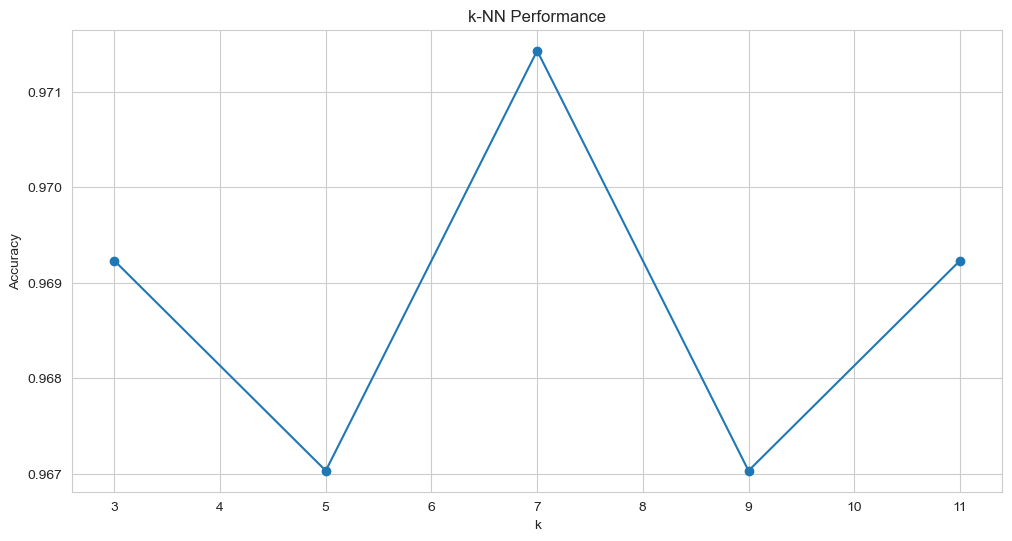

Best k: 7, Accuracy: 0.9649


In [18]:
k_values = [3, 5, 7, 9, 11]
knn_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    knn_scores.append(scores.mean())
plt.plot(k_values, knn_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Performance')
plt.show()
best_k = k_values[np.argmax(knn_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"Best k: {best_k}, Accuracy: {knn_acc:.4f}")

## 3. Decision Tree

In [19]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.9211


## 4. Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9561


## 5. Gradient Boosting

In [21]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")

Gradient Boosting Accuracy: 0.9561


## 6. Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

Naive Bayes Accuracy: 0.9298


## 7. Support Vector Machine

In [23]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy: 0.9825


## 8. Voting Classifier (Ensemble Method)


In [24]:
# Voting Classifier combines predictions from multiple base estimators
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
        ('svm', SVC(kernel='rbf', probability=True, random_state=42))
    ],
    voting='soft'  # Use predicted probabilities for voting
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)
print(f"Voting Classifier Accuracy: {voting_acc:.4f}")


Voting Classifier Accuracy: 0.9737


## 9. Stacking Classifier (Ensemble Method)


In [25]:
# Stacking Classifier uses a meta-learner to combine base estimators
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
        ('svm', SVC(kernel='rbf', probability=True, random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5  # Use 5-fold cross-validation for meta-features
)
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, stacking_pred)
print(f"Stacking Classifier Accuracy: {stacking_acc:.4f}")


Stacking Classifier Accuracy: 0.9737


## Model Comparison

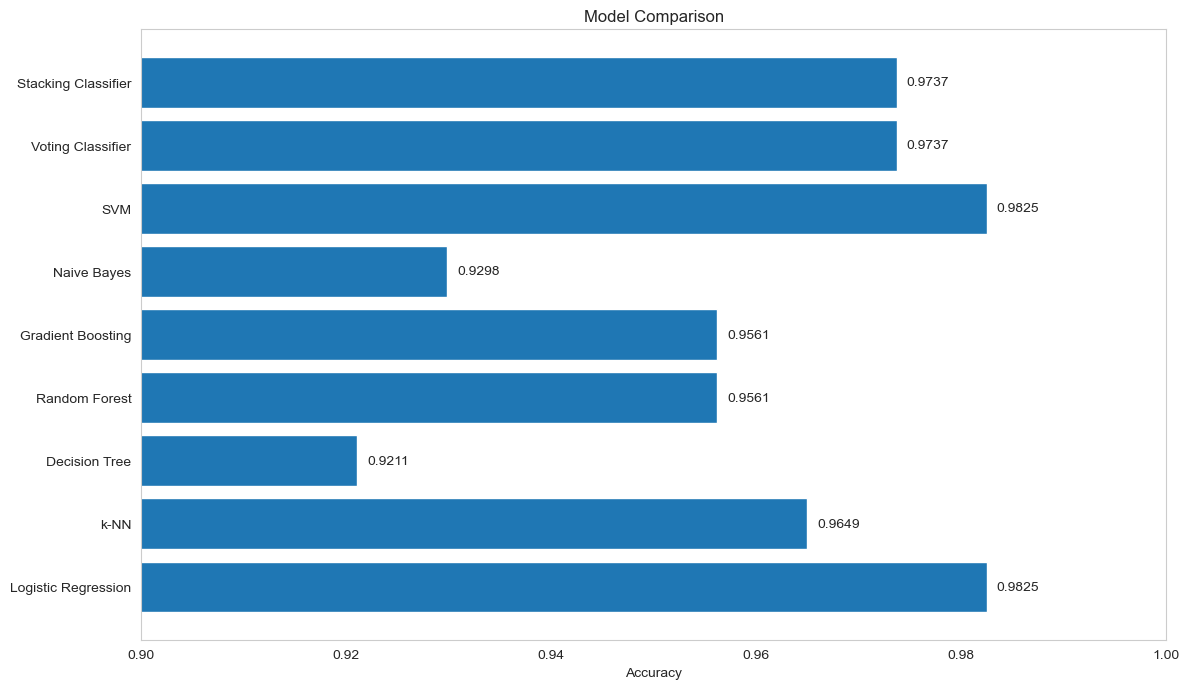

In [26]:
results = {'Logistic Regression': lr_acc, 'k-NN': knn_acc, 'Decision Tree': dt_acc,
            'Random Forest': rf_acc, 'Gradient Boosting': gb_acc, 'Naive Bayes': nb_acc, 
            'SVM': svm_acc, 'Voting Classifier': voting_acc, 'Stacking Classifier': stacking_acc}
models = list(results.keys())
accuracies = list(results.values())
plt.figure(figsize=(12, 7))
plt.barh(models, accuracies)
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim([0.9, 1.0])
for i, v in enumerate(accuracies):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.grid(False)
plt.show()

## Results Analysis

- **Dataset characteristics**: The Breast Cancer Wisconsin dataset is relatively low-noise, with 30 continuous features that are already fairly informative and become close to linearly separable after standardization.
- **Top models (SVM & Logistic Regression, accuracy = 0.9825)**: Both methods assume (or exploit) near-linear decision boundaries in the feature space.
  - **Logistic Regression** performs very well because the positive and negative classes are almost linearly separable after scaling; the model only needs to learn a single global hyperplane.
  - The **RBF SVM** can model slight non-linearities while maximizing the margin, which is helpful for borderline cases but does not dramatically outperform the linear model, suggesting the problem is mostly linear.
- **Ensemble Methods**:
  - **Voting Classifier** (accuracy = 0.9737): Combines predictions from multiple base estimators (Logistic Regression, Random Forest, SVM) using soft voting (weighted by predicted probabilities). While ensemble methods often improve performance by reducing individual model errors, here the Voting Classifier achieves slightly lower accuracy (0.9737) than the best individual models (0.9825). This occurs because:
    - The base models include Random Forest (0.9561), which has lower accuracy than SVM and Logistic Regression
    - When the best individual models (SVM and Logistic Regression) are already very strong and make similar predictions, averaging with a weaker model (Random Forest) can introduce slight errors
    - On this dataset, the linear separability is so strong that the simpler linear models outperform the more complex ensemble
  - **Stacking Classifier** (accuracy = 0.9737): Uses a meta-learner (Logistic Regression) to learn optimal combination weights through 5-fold cross-validation. Interestingly, it achieves the same accuracy as Voting Classifier (0.9737), suggesting that:
    - The meta-learner learned that the optimal combination still cannot fully compensate for the weaker Random Forest component
    - The cross-validation process may have introduced some variance, or the meta-features from the base models are not sufficiently complementary on this dataset
    - This demonstrates that stacking does not always outperform voting, especially when base models have overlapping strengths
  - **Random Forest** and **Gradient Boosting** (both = 0.9561): These are homogeneous ensemble methods that combine multiple trees. Random Forest uses bagging (bootstrap aggregating) to reduce variance, while Gradient Boosting sequentially builds trees to correct previous errors. Both reduce variance compared to a single tree, but on this dataset their extra flexibility does not fully close the gap to the margin-based models, likely because strong global linear structure dominates.
- **k-NN (accuracy = 0.9649)**: KNN benefits from the standardized features and the relatively dense regions of similar tumors, but it is more sensitive to local noise and class imbalance.
  - Each prediction depends on a small neighborhood, so mislabeled or atypical points can hurt local decisions even when the global structure is simple.
- **Tree-based models**:
  - The single **Decision Tree** (= 0.9211) underperforms due to high variance and limited depth; with only depth 5, it cannot perfectly separate all informative feature interactions.
- **Naive Bayes (= 0.9298)**: Its conditional independence assumption is violated here—many breast cancer features are strongly correlated—so it cannot exploit joint feature patterns as effectively as logistic regression or SVM, though it still performs reasonably well given its simplicity.

